# Demo of basic topological analysis of sparse networks
Spatially-embedded recurrent neural networks reveal wide spread structural and functional neuroscience findings

In [ ]:
# ensure that this is within the weighted_generative_model environment (and imaging space)
# import requirements
import os
import numpy as np
import scipy
import networkx as nx
import bct as bctpy
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import grad,jit,vmap
from jax import random
# change to project directory
os.chdir('/imaging/astle/users/da04/Postdoc/weighted_gm/weighted_generative_models')

In [99]:
# generate an example network
nnode = 100
# compute a random undirected weighted matrix
W = np.random.rand(nnode,nnode)
np.shape(W)
# make it into a matrix
W = np.matrix(W)
# make symmetrical
W = W+W.T
W = np.divide(W,2)
# binarise
threshold, upper, lower = .7,1,0
A = np.where(W>threshold,upper,lower)
# communicability
C = scipy.linalg.expm(A)
# form a graph
G = nx.Graph(A)

Text(0, 0.5, 'Node')

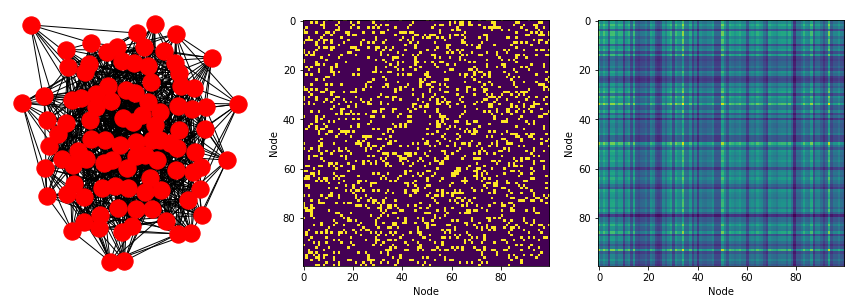

In [100]:
# visualise the graph
plt.figure(figsize=(15,5))
subax1 = plt.subplot(131)
nx.draw(G,node_color='r',edge_color='k')
# visualise the connectivity matrix
subax2 = plt.subplot(132)
plt.imshow(A)
plt.xlabel('Node')
plt.ylabel('Node')
# visualise the communciability matrix
subax3 = plt.subplot(133)
plt.imshow(C)
plt.xlabel('Node')
plt.ylabel('Node')

Text(0, 0.5, 'Frequency')

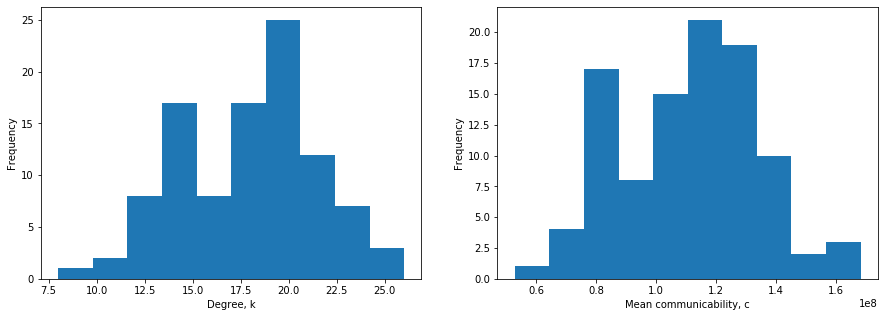

In [101]:
# compute the degree and communicability distribution
k = bctpy.degrees_und(A)
c = C.sum(axis=1)
# plot the degree distribution of this random network
plt.figure(figsize=(15,5))
subax1 = plt.subplot(121)
plt.hist(k)
plt.xlabel('Degree, k')
plt.ylabel('Frequency')
subax2 = plt.subplot(122)
plt.hist(c)
plt.xlabel('Mean communicability, c')
plt.ylabel('Frequency')

In [102]:
# compute the modularity
m,q = bctpy.modularity_und(A)

# compute the small worldness
# empirical clustering and path length
clu = np.mean(bctpy.clustering_coef_bu(A))
pth = bctpy.efficiency_bin(A)
# run nperm null models
nperm = 100
cluperm = np.zeros((nperm,1))
pthperm = np.zeros((nperm,1))
for perm in range(nperm):
    Wperm = np.random.rand(nnode,nnode)
    # make it into a matrix
    Wperm = np.matrix(Wperm)
    # make symmetrical
    Wperm = Wperm+Wperm.T
    Wperm = np.divide(Wperm,2)
    # binarise
    threshold, upper, lower = .7,1,0
    Aperm = np.where(Wperm>threshold,upper,lower)
    # take null
    cluperm[perm] = np.mean(bctpy.clustering_coef_bu(Aperm))
    pthperm[perm] = bctpy.efficiency_bin(Aperm)
# take the average of the nulls
clunull = np.mean(cluperm)
pthnull = np.mean(pthperm)
# compute the small worldness
smw = np.divide(np.divide(clu,clunull),np.divide(pth,pthnull))

# display
q, smw

(0.14905978077505513, 0.9309920956621888)